## Transfer Learning ResNet50 using Keras

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob
import os
import zipfile


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_dir = '/content/drive/My Drive/Colab Notebooks/1_Data_science_projects/2_carPrediction/Dataset'
train_dir = os.path.join(base_dir, 'Train')
test_dir = os.path.join(base_dir, 'Test')


In [ ]:
train_dir

'/content/drive/My Drive/Colab Notebooks/1_Data_science_projects/2_carPrediction/Dataset/Train'

In [ ]:
train_fnames = os.listdir(train_dir)
print(train_fnames)  # outputs the number of classes

['mercedes', 'lamborghini', 'audi']


In [ ]:
# re-size all the images to this size
IMAGE_SIZE = [224, 224]

In [ ]:
# Importing the ResNet50 library as shown below and add preprocessing layer to the front of ResNet50
# Here we will be using imagenet weights
# [3] is added for RGB channels

resnet = ResNet50(input_shape= IMAGE_SIZE + [3], weights = 'imagenet', include_top= False)

In [ ]:
# In transfer learning we already have the trained weights, so we wont train them
for layer in resnet.layers:
  layer.trainable = False

In [ ]:
# To get number of output classes
folders = glob('/content/drive/My Drive/Colab Notebooks/1_Data_science_projects/2_carPrediction/Dataset/Train/*')
folders

['/content/drive/My Drive/Colab Notebooks/1_Data_science_projects/2_carPrediction/Dataset/Train/mercedes',
 '/content/drive/My Drive/Colab Notebooks/1_Data_science_projects/2_carPrediction/Dataset/Train/lamborghini',
 '/content/drive/My Drive/Colab Notebooks/1_Data_science_projects/2_carPrediction/Dataset/Train/audi']

In [ ]:
len(folders)  # No. of output classses

3

In [ ]:
# No. of layers in the last output
x= Flatten()(resnet.output)

In [ ]:
prediction =  Dense(len(folders), activation='softmax')(x)

# Create a model object
model = Model(inputs = resnet.input, outputs = prediction )

In [ ]:
# Check the summary and structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
#COST AND OPTIMIZATION

# Telling the model which cost and optimization method to use
model.compile(
               loss='categorical_crossentropy',
               optimizer = 'adam',
              metrics = ['accuracy']
               )

In [ ]:
# IMPORT THE IMAGE DATASET

# Use the Image Data Generator to IMPORT THE IMAGE DATASET
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [ ]:
test_dir

'/content/drive/My Drive/Colab Notebooks/1_Data_science_projects/2_carPrediction/Dataset/Test'

In [ ]:
# CREATE THE TRAINING SET

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 84 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 30 images belonging to 3 classes.


In [ ]:
# FIT THE MODEL

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
3/3 [==============================] - 24s 8s/step - loss: 6.1513 - accuracy: 0.3929 - val_loss: 13.1105 - val_accuracy: 0.3333
Epoch 2/30
3/3 [==============================] - 12s 4s/step - loss: 9.1910 - accuracy: 0.4048 - val_loss: 7.8984 - val_accuracy: 0.3667
Epoch 3/30
3/3 [==============================] - 12s 4s/step - loss: 3.8721 - accuracy: 0.4048 - val_loss: 5.6121 - val_accuracy: 0.3333
Epoch 4/30
3/3 [==============================] - 12s 4s/step - loss: 6.0951 - accuracy: 0.4524 - val_loss: 5.4917 - val_accuracy: 0.4333
Epoch 5/30
3/3 [==============================] - 14s 5s/step - loss: 3.2744 - accuracy: 0.4286 - val_loss: 1.9312 - val_accuracy: 0.5000
Epoch 6/30
3/3 [==============================] - 15s 5s/step - loss: 2.6340 - accuracy: 0.4762 - val_loss: 3.9913 - val_accuracy: 0.5000
Epoch 7/30
3/3 [==============================] - 12s 4s/step - loss: 2.7552 - accuracy: 0.5238

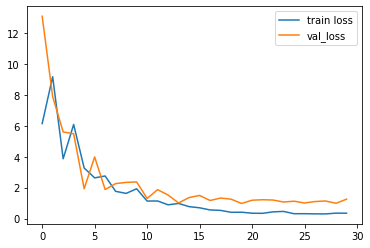

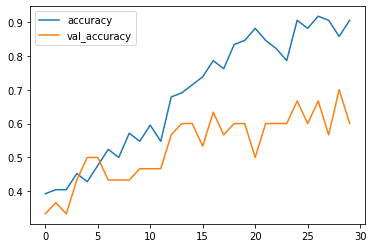

In [ ]:
# Ploting the loss
plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

print('\n')

# Ploting the accuracy
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

In [ ]:
# Making the prediction 
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[9.0553183e-03, 6.9546068e-01, 2.9548398e-01],
       [8.4458627e-03, 6.4588147e-01, 3.4567258e-01],
       [9.5006656e-03, 3.1656155e-03, 9.8733366e-01],
       [5.9668748e-03, 8.5773218e-01, 1.3630089e-01],
       [1.8392835e-02, 5.6079012e-01, 4.2081708e-01],
       [1.1563955e-02, 5.4141951e-01, 4.4701648e-01],
       [1.5177178e-01, 6.9200468e-01, 1.5622349e-01],
       [3.5727784e-02, 4.9563989e-01, 4.6863228e-01],
       [1.5952304e-02, 5.8840567e-01, 3.9564201e-01],
       [3.2747849e-03, 9.5955849e-01, 3.7166648e-02],
       [4.1678574e-04, 9.9891829e-01, 6.6493452e-04],
       [8.6046529e-01, 8.5695662e-02, 5.3839069e-02],
       [3.1226665e-01, 1.6551271e-01, 5.2222061e-01],
       [1.2251029e-02, 9.2725235e-01, 6.0496628e-02],
       [3.6487520e-02, 4.8833452e-02, 9.1467899e-01],
       [1.5283442e-02, 5.5761600e-01, 4.2710051e-01],
       [7.4579711e-03, 9.4283038e-01, 4.9711607e-02],
       [3.5368260e-02, 1.0959607e-02, 9.5367217e-01],
       [1.5423855e-02, 7.631

* Note that we obtain an array of probablities for each class for each image or say data point
* The prediction of the model is for the class with highest probablity




In [ ]:
y_pred.shape  # For 30 images we are getting an array of probabilites for each class

(30, 3)

In [ ]:

final_pred = np.argmax(y_pred, axis=1)

In [ ]:
final_pred

array([1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 0, 2, 2, 1, 2])



**Inference : So final_pred array show the predicted class to which the image belongs**




In [ ]:
# Run this code to save the model as a h5 file

#from tensorflow.keras.models import load_model
#from tensorflow.keras.models import load_model
#model.save('carbrand_resnet50.h5')

#### Now we will try to predict new images of each class using our model and check its robustness



In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
img_a=image.load_img('/content/drive/My Drive/Colab Notebooks/1_Data_science_projects/2_carPrediction/Dataset/Val/audi_vale.JPG',
                   target_size=(224,224))

img_l=image.load_img('/content/drive/My Drive/Colab Notebooks/1_Data_science_projects/2_carPrediction/Dataset/Val/lam_val.JPG',
                   target_size=(224,224))

img_m=image.load_img('/content/drive/My Drive/Colab Notebooks/1_Data_science_projects/2_carPrediction/Dataset/Val/merc_val.JPG',
                   target_size=(224,224))



*  So we have taken one  image for each class and will try to predict their class using our model.
*   We need to check what our model predicts



In [ ]:
x_a = image.img_to_array(img_a)  # Image is converted to tensors having pixel values 
x_l = image.img_to_array(img_l)
x_m = image.img_to_array(img_m)

x_a

array([[[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       ...,

       [[248., 249., 251.],
        [248., 249., 251.],
        [248., 249., 251.],
        ...,
        [108., 108., 108.],
        [108., 108., 108.],
        [109., 109., 109.]],

       [[248., 249., 251.],
        [248., 249., 251.],
        [248., 249., 251.],
        ...,
        [108., 108., 108.],
        [108., 108., 108.],
        [109., 109., 109.]],

       [[248., 249., 251.],
        [248., 249., 251.],
        [248., 2

In [ ]:
print(x_a.shape)
print(x_l.shape)
print(x_m.shape)

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


In [ ]:
x_a = x_a/225
x_l = x_l/225
x_m = x_m/225

In [ ]:
x_a = np.expand_dims(x_a,axis=0)
img_data_a = preprocess_input(x_a)
x_l = np.expand_dims(x_l,axis=0)
img_data_l = preprocess_input(x_l)
x_m = np.expand_dims(x_m,axis=0)
img_data_m = preprocess_input(x_m)


print(img_data_a.shape)
print(img_data_l.shape)
print(img_data_m.shape)

(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)


In [ ]:
# Now predict
model.predict(img_data_a)
model.predict(img_data_l)
model.predict(img_data_m)

array([[6.8810863e-05, 3.3597456e-04, 9.9959522e-01]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data_a), axis=1)
l=np.argmax(model.predict(img_data_l), axis=1)
m=np.argmax(model.predict(img_data_m), axis=1)

First we know a variable object is audi image lets see what our model has predicted

In [ ]:
if a == 0:
    print('Car is audi')
elif a == 1:
    print('Car is lamborghini')
else:
    print('Car is merc')

Car is merc


**Inference: First prediction not correct, lets check for other classes**

In [ ]:
if l == 0:
    print('Car is audi')
elif l == 1:
    print('Car is lamborghini')
else:
    print('Car is merc')

Car is lamborghini


In [ ]:
if m == 0:
    print('Car is audi')
elif m == 1:
    print('Car is lamborghini')
else:
    print('Car is merc')

Car is merc



**Results**
*   So 2 out of 3 predictions are correct which is actually matching with our test data accuracy
*   We can say model is performing well with 67% accuracy approx.
*  More number of images will further help model to predict and gain high accuracy



In [ ]:
# End